In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import extra_function_for_text_file as extra
import visualize_misclassification_in_probablity_space as visual
from sklearn.svm import SVC

In [2]:
filename = "../../../datasets/vehicles.csv"
dataset = pd.read_csv(filename)
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [3]:
definitions = extra.tokenize_target_column(dataset) # for tokenizing target column

Updated tokenize 'Class' column - first 5 values
0    0
1    0
2    1
3    0
4    2
Name: Class, dtype: int64
Distinct Tokens used for converting Class column to integers
Index(['van', 'saab', 'bus', 'opel'], dtype='object')


In [4]:
X, y = extra.training_data_and_target_Label_split(dataset)
X_train, X_test, y_train, y_test = extra.train_data_test_data_split(X, y, test_size=0.2)

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=10, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000)
#SVC(kernel='rbf', C=10, probability=True,
#                       random_state=0)


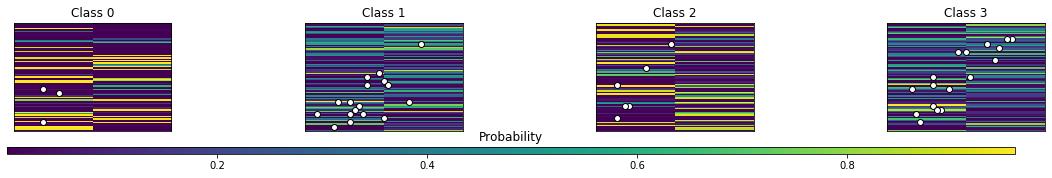

In [6]:
visual.visualize_missclassify_in_probablity_space(classifier, X_train, X_test, y_train, y_test)